# Aufgabe 1 – Maschinelles Lernen mit dem California Housing Datensatz

In [30]:
#Importiern der benötigten Bibliotheken und des Datensatzes
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam


## 1.1 Entscheidungsbaum

In [31]:
#Dateset laden und in X und Y aufteilen
load_data = fetch_california_housing()
X = load_data.data
Y = load_data.target

#Form überprüfen
print(X.shape)

#Trainings- und Testdaten aufteilen
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


(20640, 8)


### 1.1.3 Art der ML-Aufgabe und mögliche Verfahren

Art der Aufgabe: Es handelt sich um eine Regression-Aufgabe, da der Hauspreis eine kontinuierliche Zielvariable ist.

**Fünf mögliche ML-Verfahren:**
1. K-Nearest Neighbors Regressor
2. Random Forest Regressor
3. Support Vector Regression (SVR)
4. Lineare Regression
5. Neuronale Netzwerke

### 1.1.4. Funktion des Entscheidungsbaum
An jedem Knoten stellt der Baum eine Frage: "Ist Feature X größer als Schwellenwert Y?" und teilt die Daten dann in zwei Gruppen.
Den besten Schwellenwert findet er, indem er alle möglichen Splits ausprobiert und den nimmt der den MSE in den entstehenden Gruppen minimiert.
Der Baum zerlegt den Datensatz Schritt für Schritt in immer kleinere Rechtecke im Feature-Raum, und in jedem Rechteck wird der Durchschnitt vorhergesagt. Der Baum wird so lange erweitert, bis ein Abbruchkriterium erreicht wird. Für die Vorhersage eines neuen Datenpunkts durch den Baum, wird der Datenpunkt von der Wurzel aus durch die Knoten geleitet, basierend auf den Antworten auf die Fragen an den Knoten, bis er ein Blatt erreicht. Das Blatt enthält die Vorhersage.



In [32]:
#Entscheidungsbaum-Regressor erstellen und trainieren
dt_model = DecisionTreeRegressor(random_state=41)
dt_model.fit(X_train, Y_train)
#Vorhersagen auf den Testdaten machen
Y_pred = dt_model.predict(X_test)

print(f'Anzahl der Blätter: {dt_model.get_n_leaves()}')


Anzahl der Blätter: 15860


In [33]:
#MSE berechnen
mse_dt = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse_dt:.4f}')

Mean Squared Error: 0.5017


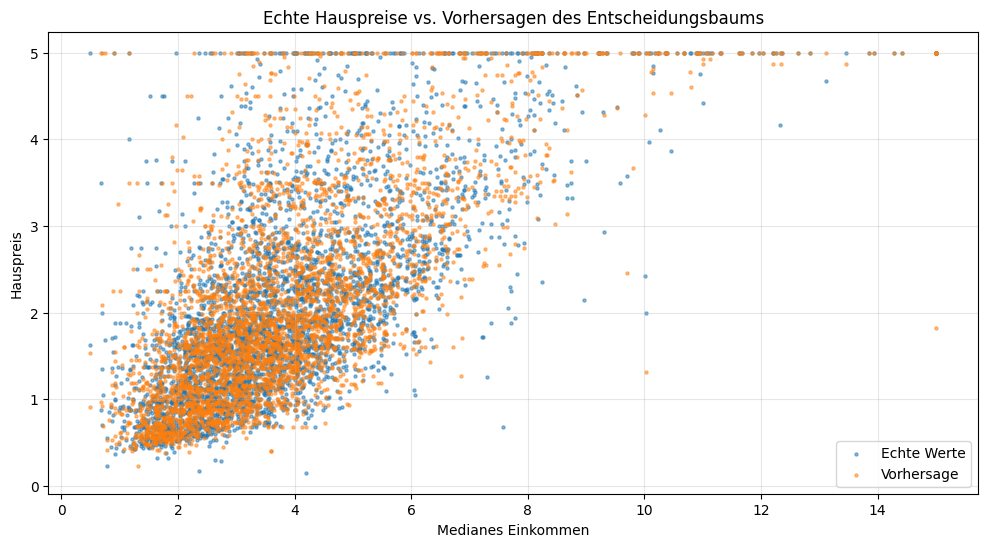

In [34]:
#Nehme Spalte 1 von Data (print(load_data.feature_names))
X_test_MedInc = X_test[:, 0]

#Visualisierung
plt.figure(figsize=(12, 6))
plt.scatter(X_test_MedInc, Y_test, label='Echte Werte', alpha=0.5, s=5)
plt.scatter(X_test_MedInc, Y_pred, label='Vorhersage', alpha=0.5, s=5)
plt.title('Echte Hauspreise vs. Vorhersagen des Entscheidungsbaums')
plt.xlabel('Medianes Einkommen')
plt.ylabel('Hauspreis')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Statt einer glatten Kurve sieht mam die Vorhersagen auf bestimmten Höhen, das sind die Durchschnittswerte der Blätter. Der Baum kennt nur endlich viele Ausgabewerte.
Im Datensatz sind Preise über 5 abgeschnitten. Das sieht man als horizontale Linie bei y=5 bei den echten Werten. Problematisch für die Vorhersage. Es gibt Werte weit außerhalb des Bereichs, leichtes Overfitting.

## 1.2 Random Forest Regressor

**Vorteile:**
- Bessere Generalisierung durch Aggregation mehrerer Bäume
- Robust gegenüber Ausreißern und Rauschen
- Kann komplexe nichtlineare Beziehungen modellieren

**Nachteile:**
- Weniger interpretierbar als einzelne Entscheidungsbäume
- Kann bei sehr großen Datensätzen langsam sein
- Kein einzelner Entscheidungspfad mehr nachvollziehbar

In [35]:
#Random Forest Regressor erstellen und trainieren
rf_model = RandomForestRegressor(random_state=41)
rf_model.fit(X_train,Y_train)

print(f"Anzahl der Bäume: {rf_model.n_estimators}")

Anzahl der Bäume: 100


In [36]:
#Vorhersagen mit Random Forest machen
Y_pred_rf_train = rf_model.predict(X_train)
Y_pred_rf_test = rf_model.predict(X_test)

#MSE und R2 Score berechnen
mse_rf_train = mean_squared_error(Y_train, Y_pred_rf_train)
mse_rf_test = mean_squared_error(Y_test, Y_pred_rf_test)

r2_rf_train = r2_score(Y_train, Y_pred_rf_train)
r2_rf_test = r2_score(Y_test, Y_pred_rf_test)

#Ausgabe mit 4 Nachkommastellen
print(f"MSE Trainingsdaten: {mse_rf_train:.4f}")
print(f"MSE Testdaten: {mse_rf_test:.4f}")
print(f"R2 Trainingsdaten: {r2_rf_train:.4f}")
print(f"R2 Testdaten: {r2_rf_test:.4f}")


MSE Trainingsdaten: 0.0354
MSE Testdaten: 0.2525
R2 Trainingsdaten: 0.9735
R2 Testdaten: 0.8073


In [37]:
#Hyperparameter-Tuning mit GridSearchCV

#Mindestens 6 Kombinationen von n_estimators und max_depth
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

#GridSearchCV erstellen
grid_search = GridSearchCV( 
    estimator=RandomForestRegressor(random_state=41),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1
)

#GridSearchCV auf Trainingsdaten anwenden
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=41), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]})

In [38]:
#Beste Hyperparameter und MSE ausgeben
print(f'Beste Hyperparameter: {grid_search.best_params_}')

Y_pred_rf_best_train = grid_search.best_estimator_.predict(X_train)
Y_pred_rf_best_test = grid_search.best_estimator_.predict(X_test)

print(f'MSE Trainingdaten: {mean_squared_error(Y_train, Y_pred_rf_best_train):.4f}')
print(f'MSE Testdaten: {mean_squared_error(Y_test, Y_pred_rf_best_test):.4f}')

Beste Hyperparameter: {'max_depth': 20, 'n_estimators': 200}
MSE Trainingdaten: 0.0367
MSE Testdaten: 0.2523


### 1.2.6 Bootstraping und max features
Bootstraping: Jeder Baum wird mit einem zufälligen Sample der Trainingsdaten trainiert. Dadurch entsteht Vielfalt unter den Bäumen, was die Generalisierung verbessert.

Max features: Bei jedem Split wird nur eine zufällige Auswahl von Features berücksichtigt. Das erhöht die Diversität der Bäume weiter und verhindert, dass einzelne starke Prädiktoren alle Bäume dominieren. 

Durch diese Techniken sinkt die Varianz des Modells im Vergleich zu einem einzelnen Baum, während der Bias weitgehend gleich bleib.

## 1.3 Neuronales Netzwerk

In [39]:
#Neuronales Netz erstellen und trainieren

#Trainings-, Validierungs- und Testdaten aufteilen 70/15/15
X_train_nn, X_temp, Y_train_nn, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=41)
X_val_nn, X_test_nn, Y_val_nn, Y_test_nn = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=41)

#Neurales Netz mit Modell erstellen
def build_nn_model(neurons, learning_rate):
    model = Sequential()
    model.add(Input(shape=(8,))) #Eingabeschicht mit der Anzahl der Merkmale
    model.add(Dense(neurons, activation='relu')) #Versteckte Schicht mit ReLU-Aktivierungsfunktion
    model.add(Dropout(0.2)) #Dropout-Schicht hinzufügen
    model.add(Dense(1)) #Ausgabeschicht


    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    return model


In [40]:
#Hyperparameter-Tuning für das Neuronale Netz - 6 verschiedene Kombinationen
combinations = [
    {'neurons': 32, 'learning_rate': 0.01},
    {'neurons': 32, 'learning_rate': 0.001},
    {'neurons': 64, 'learning_rate': 0.01},
    {'neurons': 64, 'learning_rate': 0.001},
    {'neurons': 128, 'learning_rate': 0.01},
    {'neurons': 128, 'learning_rate': 0.001}
]
best_val_mae = float('inf')
best_combo = None
best_model = None

#Training und Evaluierung für jede Kombination
for combo in combinations:
    neurons = combo['neurons']
    learning_rate = combo['learning_rate']
    print(f'Training mit {neurons} Neuronen und Lernrate {learning_rate}')

    nn_model = build_nn_model(neurons, learning_rate)
    history = nn_model.fit(X_train_nn, Y_train_nn, validation_data=(X_val_nn, Y_val_nn), epochs=100, batch_size=32, verbose=0)
    
    #Beste Kombination basierend auf Validierungsverlust speichern
    val_mae = history.history['val_mae'][-1]
    if val_mae < best_val_mae:
        best_val_mae = val_mae
        best_combo = combo
        best_model = nn_model
    
print(f'Beste Kombination: {best_combo}')


Training mit 32 Neuronen und Lernrate 0.01
Training mit 32 Neuronen und Lernrate 0.001
Training mit 64 Neuronen und Lernrate 0.01
Training mit 64 Neuronen und Lernrate 0.001
Training mit 128 Neuronen und Lernrate 0.01
Training mit 128 Neuronen und Lernrate 0.001
Beste Kombination: {'neurons': 128, 'learning_rate': 0.001}


### 1.3.4 Bedeutung Anzahl Neuronen in der Verdeckten Schicht und der learning rate
Je mehr Neuronen, desto komplexere Funktionen kann das Netzwerk lernen. Aber zu viele Neuronen können auch zu Overfitting führen.

Die learning rate bestimmt, wie stark die Gewichte bei jedem Schritt des Trainings angepasst werden. Eine zu hohe learning rate kann dazu führen, dass das Modell nicht konvergiert, während eine zu niedrige learning rate das Training sehr langsam macht.

In [41]:
#Bestes Modell auf Testdaten evaluieren
mae_train = best_model.evaluate(X_train_nn, Y_train_nn, verbose=0)[1]
mae_val = best_model.evaluate(X_val_nn, Y_val_nn, verbose=0)[1]
mae_test = best_model.evaluate(X_test_nn, Y_test_nn, verbose=0)[1]
print(f'MAE Trainingsdaten: {mae_train:.4f}')
print(f'MAE Validierungsdaten: {mae_val:.4f}')
print(f'MAE Testdaten: {mae_test:.4f}')

MAE Trainingsdaten: 0.5401
MAE Validierungsdaten: 0.5371
MAE Testdaten: 0.5373
